In [2]:
import os
import sys
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, SequentialSampler
import pickle
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.append('../src')
from data_loader import SentimentDataset, create_data_loader
from visualization import TrainingVisualizer

# Set style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False

print("✅ Imported all libraries successfully!")
print(f"🔧 PyTorch version: {torch.__version__}")
print(f"💻 Device: {'CUDA' if torch.cuda.is_available() else 'CPU'}")

# Thiết lập device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


✅ Imported all libraries successfully!
🔧 PyTorch version: 2.6.0+cpu
💻 Device: CPU


In [3]:
# Đường dẫn đến final model
MODEL_PATH = "../saved_results/final_model"
TOKENIZER_PATH = "../models/tokenizer"

print("🔄 Loading model and tokenizer...")
print(f"📁 Model path: {MODEL_PATH}")
print(f"📁 Tokenizer path: {TOKENIZER_PATH}")

# Load tokenizer
print("📝 Loading tokenizer...")
tokenizer = AutoTokenizer.from_pretrained(TOKENIZER_PATH)
print(f"✅ Tokenizer loaded: {tokenizer.__class__.__name__}")

# Load model
print("🤖 Loading model...")
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH)
model.to(device)
model.eval()

print(f"✅ Model loaded: {model.__class__.__name__}")
print(f"🎯 Number of labels: {model.config.num_labels}")
print(f"💻 Model on device: {next(model.parameters()).device}")

# Class labels
class_names = ['Negative', 'Neutral', 'Positive']
print(f"🏷️ Class names: {class_names}")

# Model info
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"📊 Total parameters: {total_params:,}")
print(f"📊 Trainable parameters: {trainable_params:,}")
print(f"📊 Model size: ~{total_params * 4 / 1024 / 1024:.1f} MB")


🔄 Loading model and tokenizer...
📁 Model path: ../saved_results/final_model
📁 Tokenizer path: ../models/tokenizer
📝 Loading tokenizer...
✅ Tokenizer loaded: PhobertTokenizer
🤖 Loading model...


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

✅ Model loaded: RobertaForSequenceClassification
🎯 Number of labels: 3
💻 Model on device: cpu
🏷️ Class names: ['Negative', 'Neutral', 'Positive']
📊 Total parameters: 135,000,579
📊 Trainable parameters: 135,000,579
📊 Model size: ~515.0 MB


In [ ]:
# Đường dẫn đến final model
MODEL_PATH = "../saved_results/final_model"
TOKENIZER_PATH = "../models/tokenizer"

print("🔄 Loading model and tokenizer...")
print(f"📁 Model path: {MODEL_PATH}")
print(f"📁 Tokenizer path: {TOKENIZER_PATH}")

# Load tokenizer
print("📝 Loading tokenizer...")
tokenizer = AutoTokenizer.from_pretrained(TOKENIZER_PATH)
print(f"✅ Tokenizer loaded: {tokenizer.__class__.__name__}")

# Load model
print("🤖 Loading model...")
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH)
model.to(device)
model.eval()

print(f"✅ Model loaded: {model.__class__.__name__}")
print(f"🎯 Number of labels: {model.config.num_labels}")
print(f"💻 Model on device: {next(model.parameters()).device}")

# Class labels
class_names = ['Negative', 'Neutral', 'Positive']
print(f"🏷️ Class names: {class_names}")

# Model info
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"📊 Total parameters: {total_params:,}")
print(f"📊 Trainable parameters: {trainable_params:,}")
print(f"📊 Model size: ~{total_params * 4 / 1024 / 1024:.1f} MB")


🔄 Loading model and tokenizer...
📁 Model path: ../saved_results/final_model
📁 Tokenizer path: ../models/tokenizer
📝 Loading tokenizer...
✅ Tokenizer loaded: PhobertTokenizer
🤖 Loading model...


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

✅ Model loaded: RobertaForSequenceClassification
🎯 Number of labels: 3
💻 Model on device: cpu
🏷️ Class names: ['Negative', 'Neutral', 'Positive']
📊 Total parameters: 135,000,579
📊 Trainable parameters: 135,000,579
📊 Model size: ~515.0 MB


In [4]:
# Load test data
TEST_DATA_PATH = "../data/processed/test.pkl"

print("📊 Loading test data...")
print(f"📁 Test data path: {TEST_DATA_PATH}")

# Load test dataset using SentimentDataset
test_dataset = SentimentDataset(data_path=TEST_DATA_PATH)

# Tạo test DataLoader
test_loader = create_data_loader(
    test_dataset, 
    batch_size=32, 
    sampler_type='sequential'
)

print(f"🔄 Created test DataLoader with batch size: 32")
print(f"📊 Number of batches: {len(test_loader)}")

# Hiển thị class distribution
test_dataset.get_class_distribution()

total_test_samples = len(test_dataset)
print(f"\n📏 Total test samples: {total_test_samples}")


📊 Loading test data...
📁 Test data path: ../data/processed/test.pkl
Dataset initialized with 3166 samples
🔄 Created test DataLoader with batch size: 32
📊 Number of batches: 99
Class distribution:
  Negative (0): 1409 samples (44.5%)
  Neutral (1): 167 samples (5.3%)
  Positive (2): 1590 samples (50.2%)

📏 Total test samples: 3166


In [5]:
def predict_on_test_set(model, test_loader, device):
    """
    Thực hiện prediction trên test set
    """
    model.eval()
    all_predictions = []
    all_labels = []
    all_probabilities = []
    
    print("🔮 Running predictions on test set...")
    
    with torch.no_grad():
        for batch_idx, batch in enumerate(test_loader):
            # Move batch to device
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            # Forward pass
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            
            # Get predictions
            probabilities = torch.softmax(outputs.logits, dim=-1)
            predictions = torch.argmax(probabilities, dim=-1)
            
            # Store results
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())
            
            # Progress
            if (batch_idx + 1) % 10 == 0:
                print(f"  Processed {batch_idx + 1}/{len(test_loader)} batches")
    
    print("✅ Predictions completed!")
    
    return np.array(all_predictions), np.array(all_labels), np.array(all_probabilities)

# Thực hiện prediction
y_pred, y_true, probabilities = predict_on_test_set(model, test_loader, device)

print(f"📊 Prediction results:")
print(f"  True labels shape: {y_true.shape}")
print(f"  Predicted labels shape: {y_pred.shape}")
print(f"  Probabilities shape: {probabilities.shape}")

# Tính toán metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"\n🎯 Overall Performance Metrics:")
print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  Precision (weighted): {precision:.4f}")
print(f"  Recall (weighted): {recall:.4f}")
print(f"  F1-Score (weighted): {f1:.4f}")

# Per-class metrics
print(f"\n📊 Per-class Performance:")
precision_per_class = precision_score(y_true, y_pred, average=None)
recall_per_class = recall_score(y_true, y_pred, average=None)
f1_per_class = f1_score(y_true, y_pred, average=None)

for i, class_name in enumerate(class_names):
    print(f"  {class_name}:")
    print(f"    Precision: {precision_per_class[i]:.4f}")
    print(f"    Recall: {recall_per_class[i]:.4f}")
    print(f"    F1-Score: {f1_per_class[i]:.4f}")


🔮 Running predictions on test set...
  Processed 10/99 batches
  Processed 20/99 batches
  Processed 30/99 batches
  Processed 40/99 batches
  Processed 50/99 batches
  Processed 60/99 batches
  Processed 70/99 batches
  Processed 80/99 batches
  Processed 90/99 batches
✅ Predictions completed!
📊 Prediction results:
  True labels shape: (3166,)
  Predicted labels shape: (3166,)
  Probabilities shape: (3166, 3)

🎯 Overall Performance Metrics:
  Accuracy: 0.9315 (93.15%)
  Precision (weighted): 0.9275
  Recall (weighted): 0.9315
  F1-Score (weighted): 0.9283

📊 Per-class Performance:
  Negative:
    Precision: 0.9343
    Recall: 0.9595
    F1-Score: 0.9468
  Neutral:
    Precision: 0.6957
    Recall: 0.4790
    F1-Score: 0.5674
  Positive:
    Precision: 0.9458
    Recall: 0.9541
    F1-Score: 0.9499


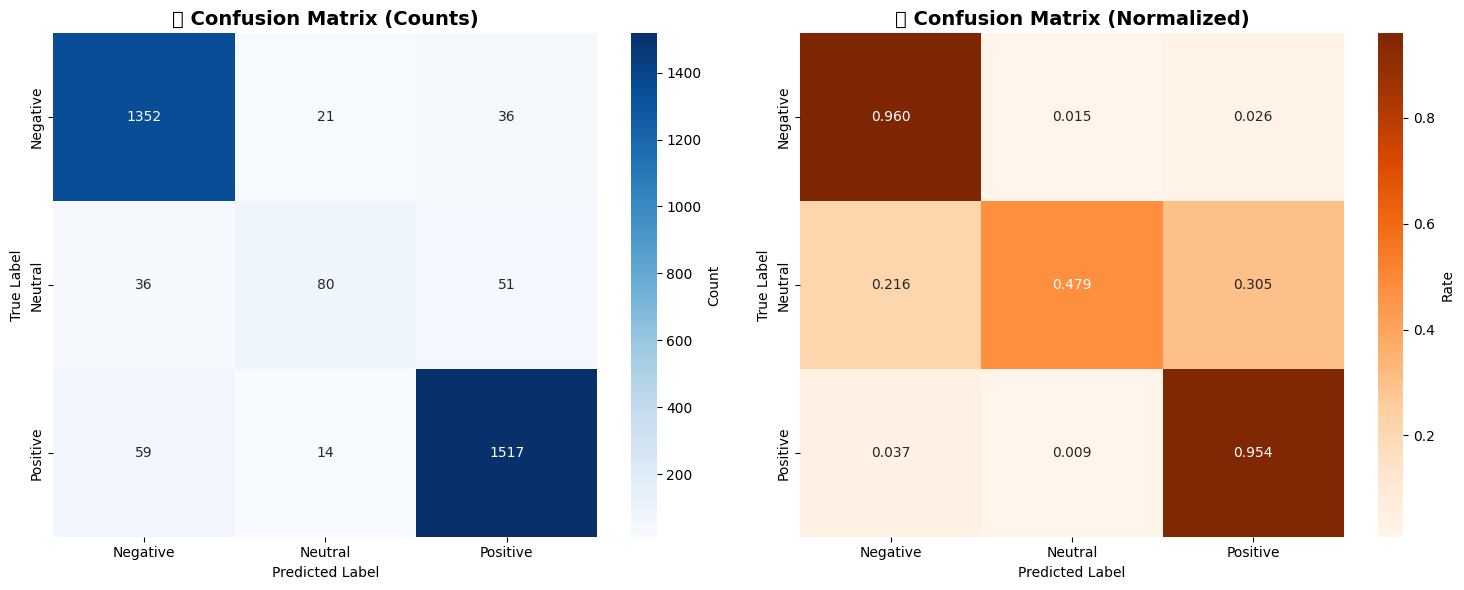

📊 Detailed Confusion Matrix Analysis:

Raw Counts:
[[1352   21   36]
 [  36   80   51]
 [  59   14 1517]]

Normalized (by true class):
[[0.96  0.015 0.026]
 [0.216 0.479 0.305]
 [0.037 0.009 0.954]]

🎯 Per-class Analysis:

Negative:
  True Positive: 1352
  False Positive: 95
  False Negative: 57
  True Negative: 1662
  Sensitivity (Recall): 0.9595
  Specificity: 0.9459

Neutral:
  True Positive: 80
  False Positive: 35
  False Negative: 87
  True Negative: 2964
  Sensitivity (Recall): 0.4790
  Specificity: 0.9883

Positive:
  True Positive: 1517
  False Positive: 87
  False Negative: 73
  True Negative: 1489
  Sensitivity (Recall): 0.9541
  Specificity: 0.9448

📋 Detailed Classification Report:
              precision    recall  f1-score   support

    Negative     0.9343    0.9595    0.9468      1409
     Neutral     0.6957    0.4790    0.5674       167
    Positive     0.9458    0.9541    0.9499      1590

    accuracy                         0.9315      3166
   macro avg     0.8586 

In [6]:
# Tạo Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_normalized = confusion_matrix(y_true, y_pred, normalize='true')

# Tạo figure với 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix - Raw counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names,
           ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_title('🔢 Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Confusion Matrix - Normalized
sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Oranges',
           xticklabels=class_names, yticklabels=class_names,
           ax=ax2, cbar_kws={'label': 'Rate'})
ax2.set_title('📊 Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Chi tiết confusion matrix
print("📊 Detailed Confusion Matrix Analysis:")
print("\nRaw Counts:")
print(cm)

print("\nNormalized (by true class):")
print(cm_normalized.round(3))

print("\n🎯 Per-class Analysis:")
for i, class_name in enumerate(class_names):
    true_positive = cm[i, i]
    false_positive = cm[:, i].sum() - true_positive
    false_negative = cm[i, :].sum() - true_positive
    true_negative = cm.sum() - true_positive - false_positive - false_negative
    
    print(f"\n{class_name}:")
    print(f"  True Positive: {true_positive}")
    print(f"  False Positive: {false_positive}")
    print(f"  False Negative: {false_negative}")
    print(f"  True Negative: {true_negative}")
    
    # Sensitivity (Recall) và Specificity
    sensitivity = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
    
    print(f"  Sensitivity (Recall): {sensitivity:.4f}")
    print(f"  Specificity: {specificity:.4f}")

# Classification Report
print(f"\n📋 Detailed Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


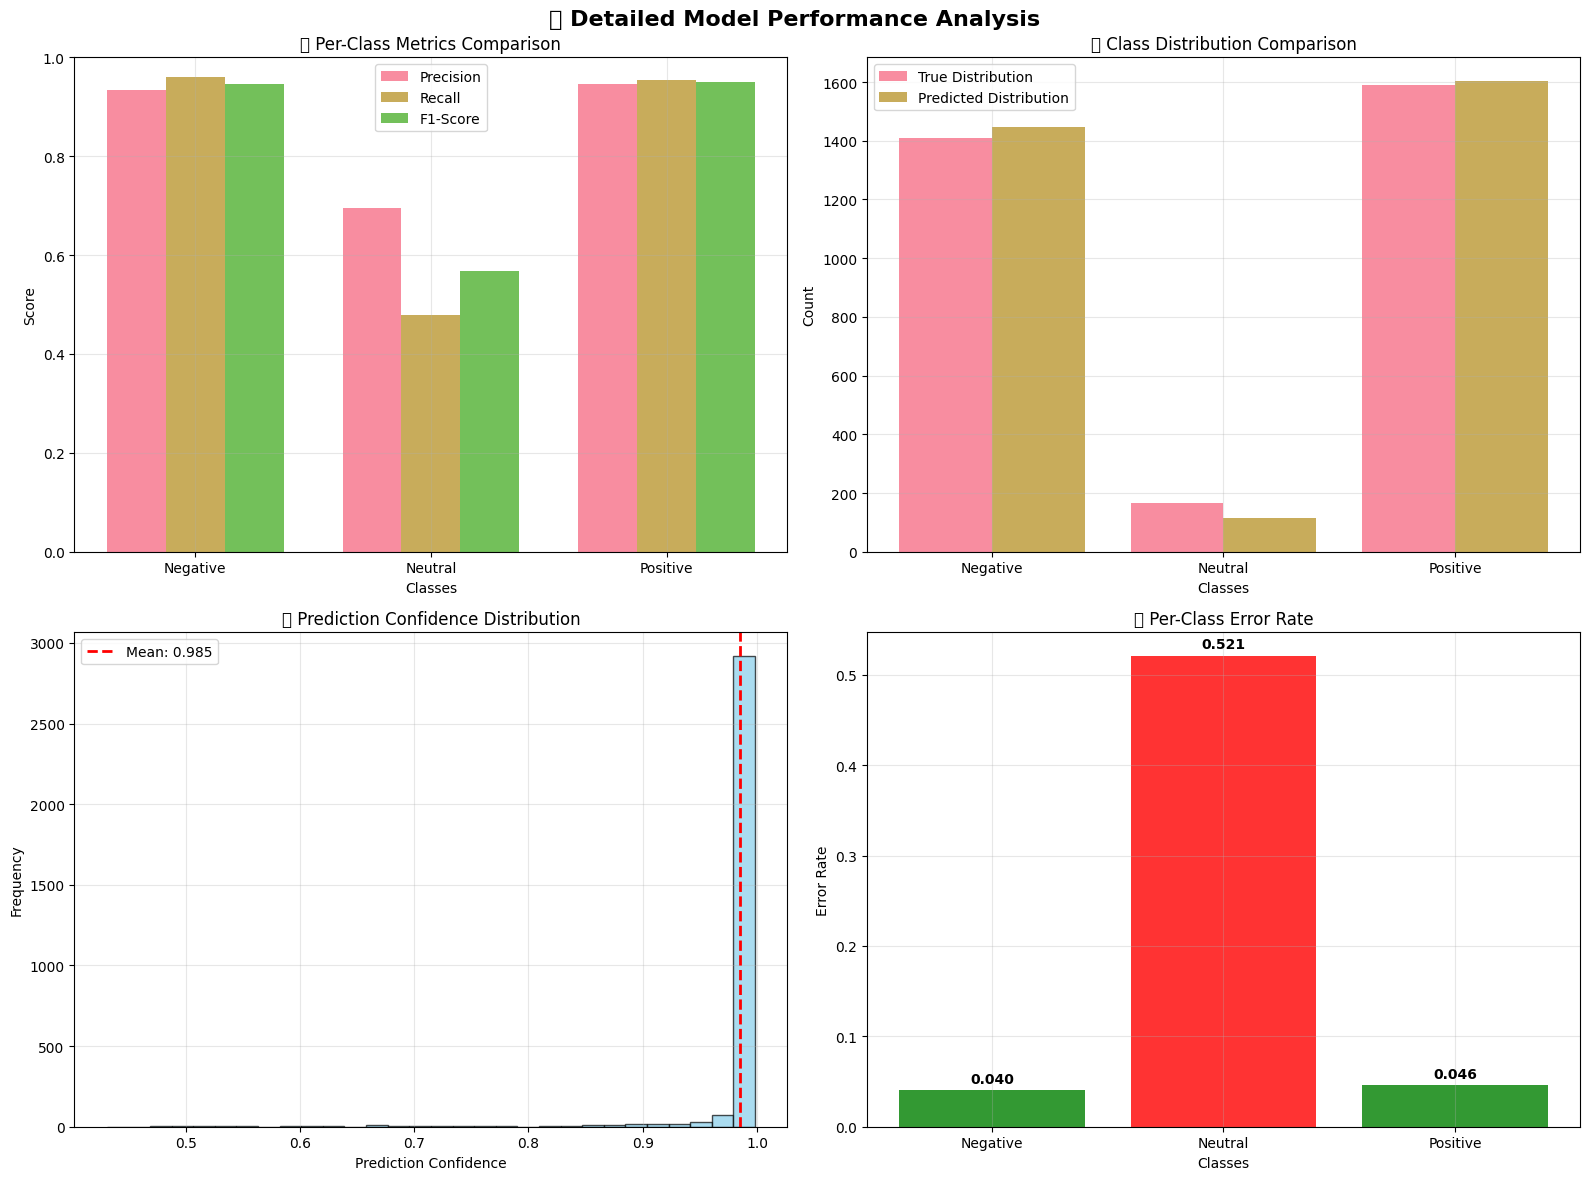

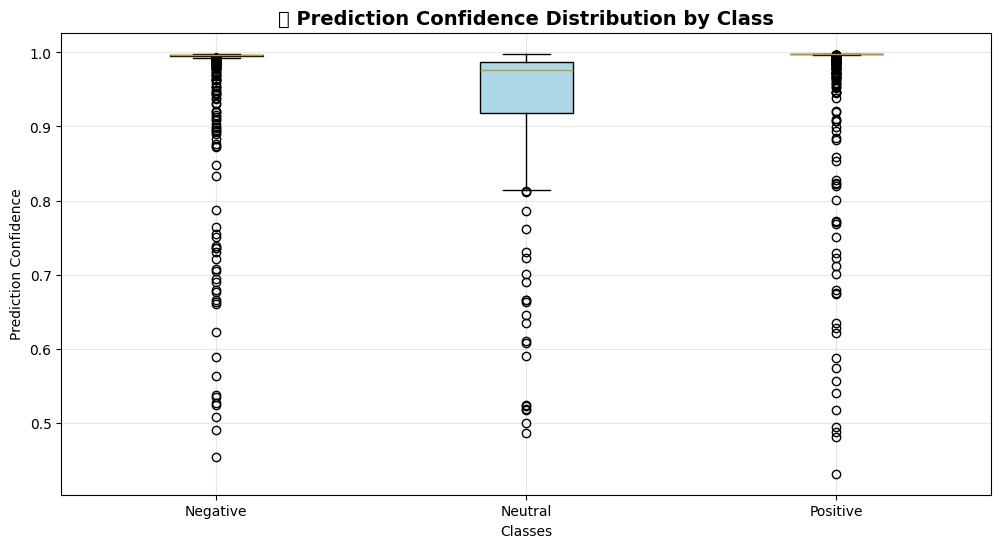

📊 Confidence Statistics by Class:
Negative:
  Mean confidence: 0.9865
  Std confidence: 0.0516
  Min confidence: 0.4530
  Max confidence: 0.9981
  Median confidence: 0.9962
Neutral:
  Mean confidence: 0.9213
  Std confidence: 0.1204
  Min confidence: 0.4857
  Max confidence: 0.9978
  Median confidence: 0.9767
Positive:
  Mean confidence: 0.9900
  Std confidence: 0.0474
  Min confidence: 0.4310
  Max confidence: 0.9983
  Median confidence: 0.9980


In [7]:
# 1. Per-class Performance Bar Chart
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Detailed Model Performance Analysis', fontsize=16, fontweight='bold')

# Metrics comparison
metrics_data = {
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F1-Score': f1_per_class
}

x = np.arange(len(class_names))
width = 0.25

ax1 = axes[0, 0]
for i, (metric_name, values) in enumerate(metrics_data.items()):
    ax1.bar(x + i*width, values, width, label=metric_name, alpha=0.8)

ax1.set_xlabel('Classes')
ax1.set_ylabel('Score')
ax1.set_title('📊 Per-Class Metrics Comparison')
ax1.set_xticks(x + width)
ax1.set_xticklabels(class_names)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# Class distribution comparison
ax2 = axes[0, 1]
true_counts = np.bincount(y_true)
pred_counts = np.bincount(y_pred)

x2 = np.arange(len(class_names))
ax2.bar(x2 - 0.2, true_counts, 0.4, label='True Distribution', alpha=0.8)
ax2.bar(x2 + 0.2, pred_counts, 0.4, label='Predicted Distribution', alpha=0.8)
ax2.set_xlabel('Classes')
ax2.set_ylabel('Count')
ax2.set_title('📊 Class Distribution Comparison')
ax2.set_xticks(x2)
ax2.set_xticklabels(class_names)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Prediction confidence distribution
ax3 = axes[1, 0]
max_probs = np.max(probabilities, axis=1)
ax3.hist(max_probs, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax3.axvline(max_probs.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {max_probs.mean():.3f}')
ax3.set_xlabel('Prediction Confidence')
ax3.set_ylabel('Frequency')
ax3.set_title('📊 Prediction Confidence Distribution')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Error analysis
ax4 = axes[1, 1]
correct_predictions = y_true == y_pred
error_counts = []
for i in range(len(class_names)):
    class_mask = y_true == i
    class_correct = correct_predictions[class_mask].sum()
    class_total = class_mask.sum()
    error_rate = 1 - (class_correct / class_total) if class_total > 0 else 0
    error_counts.append(error_rate)

bars = ax4.bar(class_names, error_counts, alpha=0.8, 
               color=['red' if x > 0.1 else 'green' for x in error_counts])
ax4.set_xlabel('Classes')
ax4.set_ylabel('Error Rate')
ax4.set_title('📊 Per-Class Error Rate')
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, error_counts):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
            f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Prediction confidence by class
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

confidence_by_class = []
for class_idx in range(len(class_names)):
    class_mask = y_true == class_idx
    class_confidences = max_probs[class_mask]
    confidence_by_class.append(class_confidences)

box_plot = ax.boxplot(confidence_by_class, labels=class_names, patch_artist=True)
colors = ['lightcoral', 'lightblue', 'lightgreen']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xlabel('Classes')
ax.set_ylabel('Prediction Confidence')
ax.set_title('📊 Prediction Confidence Distribution by Class', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.show()

print("📊 Confidence Statistics by Class:")
for i, class_name in enumerate(class_names):
    conf_stats = confidence_by_class[i]
    print(f"{class_name}:")
    print(f"  Mean confidence: {conf_stats.mean():.4f}")
    print(f"  Std confidence: {conf_stats.std():.4f}")
    print(f"  Min confidence: {conf_stats.min():.4f}")
    print(f"  Max confidence: {conf_stats.max():.4f}")
    print(f"  Median confidence: {np.median(conf_stats):.4f}")


🧪 Testing model with Vietnamese teacher evaluation sentences:

📝 Sample 1:
Text: 'Thầy giảng rất hay, dễ hiểu và tương tác tốt với sinh viên.'
🎯 Predicted: Positive (confidence: 0.9981)
📊 All probabilities:
   Negative: 0.0010
   Neutral: 0.0009
   Positive: 0.9981

📝 Sample 2:
Text: 'Cô giáo này dạy quá tệ, không chuẩn bị bài và thường xuyên đi muộn về sớm.'
🎯 Predicted: Negative (confidence: 0.9935)
📊 All probabilities:
   Negative: 0.9935
   Neutral: 0.0009
   Positive: 0.0055

📝 Sample 3:
Text: 'Giảng viên bình thường, có kiến thức nhưng cách truyền đạt chưa thu hút.'
🎯 Predicted: Negative (confidence: 0.9834)
📊 All probabilities:
   Negative: 0.9834
   Neutral: 0.0017
   Positive: 0.0149

📝 Sample 4:
Text: 'Thầy rất tận tâm, luôn sẵn sàng giải đáp thắc mắc và hỗ trợ sinh viên.'
🎯 Predicted: Positive (confidence: 0.9976)
📊 All probabilities:
   Negative: 0.0013
   Neutral: 0.0010
   Positive: 0.9976

📝 Sample 5:
Text: 'Cô dạy khá ổn nhưng đôi khi hơi nghiêm khắc quá mức.'
🎯 Predict

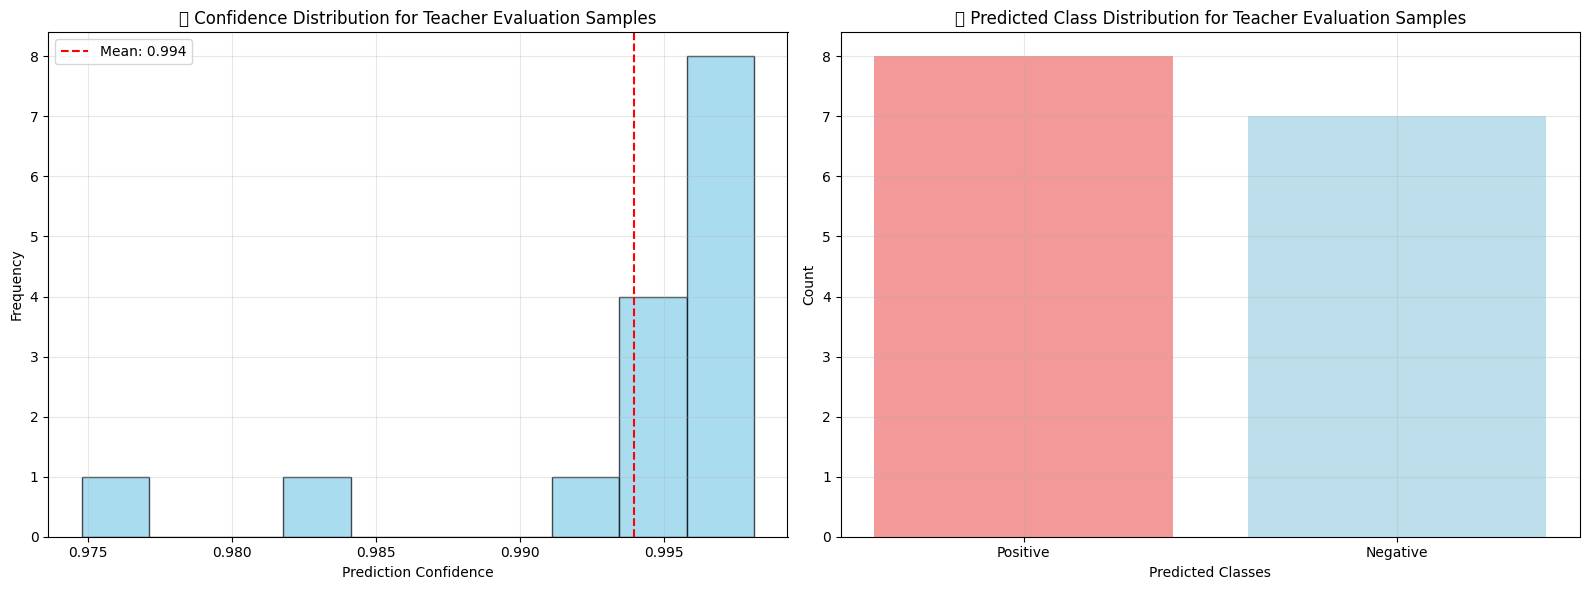


📊 Summary of teacher evaluation samples:
Total teacher evaluation sentences tested: 15
Average confidence: 0.9940
Min confidence: 0.9748
Max confidence: 0.9981
Predicted sentiment distribution for teacher evaluations:
  Positive: 8 samples
  Negative: 7 samples


In [10]:
def predict_sentiment(text, model, tokenizer, device, max_length=256):
    """
    Predict sentiment cho một câu text
    """
    model.eval()
    
    # Tokenize input
    encoded = tokenizer(
        text,
        truncation=True,
        padding='max_length',
        max_length=max_length,
        return_tensors='pt'
    )
    
    # Move to device
    input_ids = encoded['input_ids'].to(device)
    attention_mask = encoded['attention_mask'].to(device)
    
    # Predict
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        probabilities = torch.softmax(outputs.logits, dim=-1)
        predicted_class = torch.argmax(probabilities, dim=-1)
    
    # Get results
    predicted_label = predicted_class.item()
    confidence = probabilities[0][predicted_label].item()
    all_probs = probabilities[0].cpu().numpy()
    
    return predicted_label, confidence, all_probs

# Test samples - Nhận xét về giảng viên trong giáo dục
test_samples = [
    "Thầy giảng rất hay, dễ hiểu và tương tác tốt với sinh viên.",
    "Cô giáo này dạy quá tệ, không chuẩn bị bài và thường xuyên đi muộn về sớm.",
    "Giảng viên bình thường, có kiến thức nhưng cách truyền đạt chưa thu hút.",
    "Thầy rất tận tâm, luôn sẵn sàng giải đáp thắc mắc và hỗ trợ sinh viên.",
    "Cô dạy khá ổn nhưng đôi khi hơi nghiêm khắc quá mức.",
    "Giảng viên có kiến thức chuyên môn tốt, phương pháp giảng dạy phù hợp.",
    "Thầy này dạy không có tâm, chỉ đọc slide và không quan tâm đến sinh viên.",
    "Cô giáo rất nhiệt tình, tạo môi trường học tập tích cực và vui vẻ.",
    "Giảng viên hơi khô khan, cần cải thiện cách tương tác với lớp.",
    "Thầy xuất sắc! Cách giảng sinh động, kiến thức sâu rộng và luôn cập nhật.",
    "Cô này không nên làm giáo viên, thái độ tệ và thiếu trách nhiệm.",
    "Giảng viên ổn, có thể học được nhiều điều từ môn học này.",
    "Thầy rất chuyên nghiệp, bài giảng có hệ thống và dễ tiếp thu.",
    "Cô giáo tệ quá, làm sinh viên mất hứng thú với môn học.",
    "Giảng viên tuyệt vời! Đã thay đổi cách nhìn của em về môn học này."
]

print("🧪 Testing model with Vietnamese teacher evaluation sentences:")
print("=" * 80)

results = []
for i, text in enumerate(test_samples):
    pred_label, confidence, all_probs = predict_sentiment(text, model, tokenizer, device)
    predicted_class = class_names[pred_label]
    
    print(f"\n📝 Sample {i+1}:")
    print(f"Text: '{text}'")
    print(f"🎯 Predicted: {predicted_class} (confidence: {confidence:.4f})")
    print(f"📊 All probabilities:")
    for j, (class_name, prob) in enumerate(zip(class_names, all_probs)):
        print(f"   {class_name}: {prob:.4f}")
    
    results.append({
        'text': text,
        'predicted_class': predicted_class,
        'confidence': confidence,
        'probabilities': all_probs
    })

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Confidence distribution for test samples
confidences = [r['confidence'] for r in results]
ax1.hist(confidences, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Prediction Confidence')
ax1.set_ylabel('Frequency')
ax1.set_title('🎯 Confidence Distribution for Teacher Evaluation Samples')
ax1.axvline(np.mean(confidences), color='red', linestyle='--', 
           label=f'Mean: {np.mean(confidences):.3f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Predicted class distribution
predicted_classes = [r['predicted_class'] for r in results]
class_counts = pd.Series(predicted_classes).value_counts()

ax2.bar(class_counts.index, class_counts.values, alpha=0.8, 
        color=['lightcoral', 'lightblue', 'lightgreen'])
ax2.set_xlabel('Predicted Classes')
ax2.set_ylabel('Count')
ax2.set_title('📊 Predicted Class Distribution for Teacher Evaluation Samples')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Summary of teacher evaluation samples:")
print(f"Total teacher evaluation sentences tested: {len(test_samples)}")
print(f"Average confidence: {np.mean(confidences):.4f}")
print(f"Min confidence: {np.min(confidences):.4f}")
print(f"Max confidence: {np.max(confidences):.4f}")
print(f"Predicted sentiment distribution for teacher evaluations:")
for class_name, count in class_counts.items():
    print(f"  {class_name}: {count} samples")


In [11]:
print("🎯 MODEL EVALUATION SUMMARY")
print("=" * 60)

print(f"\n📊 OVERALL PERFORMANCE:")
print(f"   Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   Weighted Precision: {precision:.4f}")
print(f"   Weighted Recall: {recall:.4f}")
print(f"   Weighted F1-Score: {f1:.4f}")

print(f"\n🎯 PER-CLASS PERFORMANCE:")
for i, class_name in enumerate(class_names):
    print(f"   {class_name}:")
    print(f"     Precision: {precision_per_class[i]:.4f}")
    print(f"     Recall: {recall_per_class[i]:.4f}")
    print(f"     F1-Score: {f1_per_class[i]:.4f}")

print(f"\n📊 MODEL CONFIDENCE:")
avg_confidence = np.mean(max_probs)
print(f"   Average Prediction Confidence: {avg_confidence:.4f}")
print(f"   Confidence Standard Deviation: {np.std(max_probs):.4f}")

print(f"\n💻 MODEL SPECIFICATIONS:")
print(f"   Model: {model.__class__.__name__}")
print(f"   Base Model: PhoBERT-base")
print(f"   Total Parameters: {total_params:,}")
print(f"   Trainable Parameters: {trainable_params:,}")
print(f"   Model Size: ~{total_params * 4 / 1024 / 1024:.1f} MB")
print(f"   Device: {next(model.parameters()).device}")

print(f"\n📏 DATASET INFORMATION:")
print(f"   Test Set Size: {len(y_true)}")
print(f"   Number of Classes: {len(class_names)}")
print(f"   Class Names: {', '.join(class_names)}")

print(f"\n✅ EVALUATION COMPLETED SUCCESSFULLY!")

# Lưu kết quả đánh giá
evaluation_results = {
    'overall_metrics': {
        'accuracy': float(accuracy),
        'precision': float(precision),
        'recall': float(recall),
        'f1_score': float(f1)
    },
    'per_class_metrics': {
        class_names[i]: {
            'precision': float(precision_per_class[i]),
            'recall': float(recall_per_class[i]),
            'f1_score': float(f1_per_class[i])
        } for i in range(len(class_names))
    },
    'confidence_stats': {
        'mean': float(avg_confidence),
        'std': float(np.std(max_probs)),
        'min': float(np.min(max_probs)),
        'max': float(np.max(max_probs))
    },
    'confusion_matrix': cm.tolist(),
    'test_set_size': len(y_true),
    'model_info': {
        'total_params': total_params,
        'trainable_params': trainable_params,
        'model_size_mb': float(total_params * 4 / 1024 / 1024)
    }
}

# Lưu file JSON
import json
with open('../saved_results/evaluation_results.json', 'w', encoding='utf-8') as f:
    json.dump(evaluation_results, f, indent=2, ensure_ascii=False)

print(f"\n💾 Evaluation results saved to: ../saved_results/evaluation_results.json")


🎯 MODEL EVALUATION SUMMARY

📊 OVERALL PERFORMANCE:
   Accuracy: 0.9315 (93.15%)
   Weighted Precision: 0.9275
   Weighted Recall: 0.9315
   Weighted F1-Score: 0.9283

🎯 PER-CLASS PERFORMANCE:
   Negative:
     Precision: 0.9343
     Recall: 0.9595
     F1-Score: 0.9468
   Neutral:
     Precision: 0.6957
     Recall: 0.4790
     F1-Score: 0.5674
   Positive:
     Precision: 0.9458
     Recall: 0.9541
     F1-Score: 0.9499

📊 MODEL CONFIDENCE:
   Average Prediction Confidence: 0.9848
   Confidence Standard Deviation: 0.0575

💻 MODEL SPECIFICATIONS:
   Model: RobertaForSequenceClassification
   Base Model: PhoBERT-base
   Total Parameters: 135,000,579
   Trainable Parameters: 135,000,579
   Model Size: ~515.0 MB
   Device: cpu

📏 DATASET INFORMATION:
   Test Set Size: 3166
   Number of Classes: 3
   Class Names: Negative, Neutral, Positive

✅ EVALUATION COMPLETED SUCCESSFULLY!

💾 Evaluation results saved to: ../saved_results/evaluation_results.json
